## Statistical Experiments on the data

In [1]:
import pandas
nodes = pandas.read_csv("../nodes_official.csv", parse_dates=['Confirmed On', 'Recovered On', 'Deceased On', 'Discharged On'])
edges = pandas.read_csv("../edges_official.csv")
nodes

,ID,Case,Age,Gender,Nationality,Condition,Transmission,Cluster,Confirmed On,Recovered On,Discharged On,Deceased On
0,MAV00001,MAV00001,49,Female,Turkey,Stable,Local Transmission,NaN,2020-03-07,2020-03-21,2020-03-23,NaT
1,MAV00002,MAV00002,56,Male,South Africa,Stable,Local Transmission,NaN,2020-03-07,2020-03-23,2020-03-23,NaT
2,MAV00003,MAV00003,69,Male,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
3,MAV00004,MAV00004,67,Female,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
4,MAV00005,MAV00005,27,Female,Germany,Stable,Imported,NaN,2020-03-09,2020-03-23,2020-03-29,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
15385,MAV15386,MAV15386,33,Male,Maldives,Stable,Cluster of Cases,NaN,2021-01-27,NaT,NaT,NaT
15386,MAV15387,MAV15387,20,Female,Maldives,Stable,Cluster of Cases,NaN,2021-01-27,NaT,NaT,NaT
15387,MAV15388,MAV15388,17,Female,Maldives,Stable,Cluster of Cases,VIL11C,2021-01-26,NaT,NaT,NaT
15388,MAV15389,MAV15389,33,Female,Maldives,Stable,Cluster of Cases,DRME,2021-01-26,NaT,NaT,NaT


#### Cluster Stats

<AxesSubplot:>

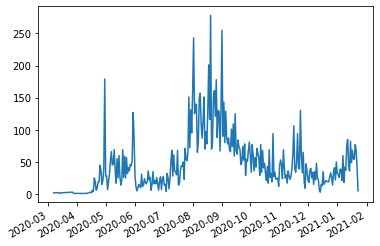

In [64]:
nodes['Confirmed On'].value_counts().plot()


#### Network graphing

Dynamic cluster maps

In [9]:
timestamp = '2020-01-01'
(nodes['Confirmed On'] < timestamp) & (nodes['Recovered On'].isna() | (nodes['Recovered On'] > timestamp))

0        False
1        False
2        False
3        False
4        False
         ...  
15385    False
15386    False
15387    False
15388    False
15389    False
Length: 15390, dtype: bool

generating 48 frames
2020-03-01
2020-03-01
2020-03-08
2020-03-15
2020-03-22
2020-03-29
2020-04-05
2020-04-12
2020-04-19
2020-04-26
2020-05-03
2020-05-10
2020-05-17
2020-05-24
2020-05-31
2020-06-07
2020-06-14
2020-06-21
2020-06-28
2020-07-05
2020-07-12
2020-07-19
2020-07-26
2020-08-02
2020-08-09
2020-08-16
2020-08-23
2020-08-30
2020-09-06
2020-09-13
2020-09-20
2020-09-27
2020-10-04
2020-10-11
2020-10-18
2020-10-25
2020-11-01
2020-11-08
2020-11-15
2020-11-22
2020-11-29
2020-12-06
2020-12-13
2020-12-20
2020-12-27
2021-01-03
2021-01-10
2021-01-17
2021-01-24


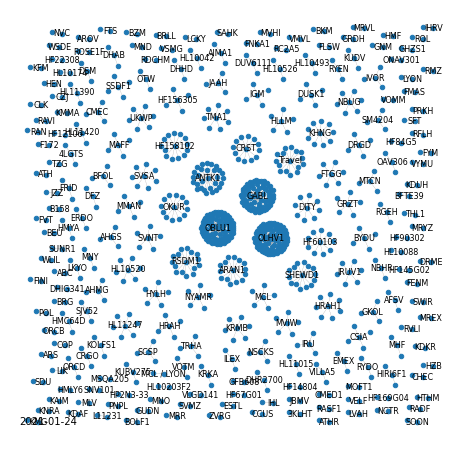

In [17]:
import networkx as nx
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def filter_nodes(timestamp) :
    return nodes[(nodes['Cluster'].notna()) & (nodes['Confirmed On'] <= timestamp) & ((nodes['Recovered On'] >= timestamp) | nodes['Recovered On'].isna()) ]

def draw_date(timestamp):
    df = filter_nodes(timestamp)
    G = nx.Graph()
    labels = {}
    for idx, case in df.iterrows():
        G.add_node(case['ID'])
        if pandas.notna(cluster:=case['Cluster']):
            if cluster not in G:
                G.add_node(cluster)
                labels[cluster] = cluster

            G.add_edge(case['ID'], cluster)

    positions = nx.nx_agraph.pygraphviz_layout(G, prog='neato', args="")
    plt.clf()
    plt.text(0,0, timestamp)
    nx.draw_networkx_labels(G, positions, labels, 8)
    nx.drawing.draw(G, pos=positions, node_size=20, width=0.1)



def dateIter(startDate, endDate, delta=timedelta(weeks=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta


dates = list(dateIter(date(2020,3,1), datetime.today().date()))

def update(i):
    print(dates[i])
    draw_date(datetime.strftime(dates[i], '%G-%m-%d'))


fig = plt.figure(figsize=(8,8))
print(f"generating {len(dates)} frames")
ani = FuncAnimation(fig, update, interval=200, frames=len(dates), blit=False)
ani.save('stuff.gif', writer='imagemagick', savefig_kwargs={'facecolor':'white'})